# Курсовой проект по дисциплине "Теория вероятностей и математическая статистика"

## Тема: "Исследование статистики покупок в продуктовом интернет-магазине"



### Тема и цели проекта

В рамках проекта будет изучена статистика покупок и посещений страниц сайта интернет-магазина по продаже продуктов.

Данные будут взяты за последние 3 года (2017-2019) (интернет-магазин занимается продажами уже более 8 лет).

Основная цель - изучение величины выручки, среднего чека и количества заказов. В рамках проекта будет осуществлена попытка: 
* определить храктер распределения данных величин;
* их математическое ожидание;
* дисперсию;
* корреляцию с другими признаками.

### Описание собранных данных

В проекте будет использоваться 3 набора данных.

#### Статистика по заказам orders.csv

Это данные собраные непосредственно с интерент-магазина. Все поля этих данных являются надежными, кроме поля с весом заказа, вес может отличаться от фактического.

В файл есть следующие колонки:
* date - дата
* year - год 
* month - месяц
* day - день месяца
* week_day - день недели (1 - понедельник, .... 7 - воскресенье)
* orders_cnt - количество заказов
* orders_sum - сумма выручки
* orders_weight - общий вес заказов в граммах
* orders_weight_avg - средний вес заказа в граммах
* orders_sum_avg - средняя сумма заказа

In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')


orders = pd.read_csv('orders.csv')
orders.head()

,date,year,month,day,week_day,orders_cnt,orders_sum,orders_weight,orders_weight_avg,orders_sum_avg
0,2017-01-01,2017,1,1,7,7,44918,68070,9724.285714,6416.857143
1,2017-01-02,2017,1,2,1,15,89206,161360,10757.333333,5947.066667
2,2017-01-03,2017,1,3,2,21,129101,232040,11049.523810,6147.666667
3,2017-01-04,2017,1,4,3,20,181116,227840,11392.000000,9055.800000
4,2017-01-05,2017,1,5,4,21,223591,246350,11730.952381,10647.190476


#### Статистика посещений

Эти данные собраны по данным сервиса google_analytics. К сожалению, данные могут быть неверными как из-за ошибок (на сайте в googel_analytics), так и из-за учета ботов.

В файл есть следующие колонки:

* date - дата
* viewes - количество просмотров страниц за день
* users	- количество посетителей за день

In [2]:
visits = pd.read_csv('visits.csv')
visits.tail()

,date,viewes,users
1090,2019-12-27,10800,1706
1091,2019-12-28,9866,1564
1092,2019-12-29,11720,1713
1093,2019-12-30,9751,1952
1094,2019-12-31,5198,1357


#### Курс доллара по дня за данные даты 

Данные выгружены с сайта finam.ru

* date - дата
* usd - официальный курс доллара

In [3]:
usd = pd.read_csv('usd.csv')
usd.head()

,date,usd
0,2017-01-01,60.6569
1,2017-01-02,60.6569
2,2017-01-03,60.6569
3,2017-01-04,60.6569
4,2017-01-05,60.6569


Объединим все данные по ключу даты

In [4]:
df = orders.set_index('date').join(visits.set_index('date')).join(usd.set_index('date'))
df.head()

,year,month,day,week_day,orders_cnt,orders_sum,orders_weight,orders_weight_avg,orders_sum_avg,viewes,users,usd
date,,,,,,,,,,,,
2017-01-01,2017,1,1,7,7,44918,68070,9724.285714,6416.857143,4534,838,60.6569
2017-01-02,2017,1,2,1,15,89206,161360,10757.333333,5947.066667,5132,1096,60.6569
2017-01-03,2017,1,3,2,21,129101,232040,11049.523810,6147.666667,5728,1118,60.6569
2017-01-04,2017,1,4,3,20,181116,227840,11392.000000,9055.800000,7016,1249,60.6569
2017-01-05,2017,1,5,4,21,223591,246350,11730.952381,10647.190476,6892,1266,60.6569


### 1. Характер распределения данных и основные количественные характеристики

Основной интерес для нас представляет такие показатели как количества заказов (orders_cnt), средний чек (orders_sum_avg) и средний вес заказа (orders_weight_avg).

Построим гистрограмму этих величин, чтобы принять решение о возможных гипотезах.

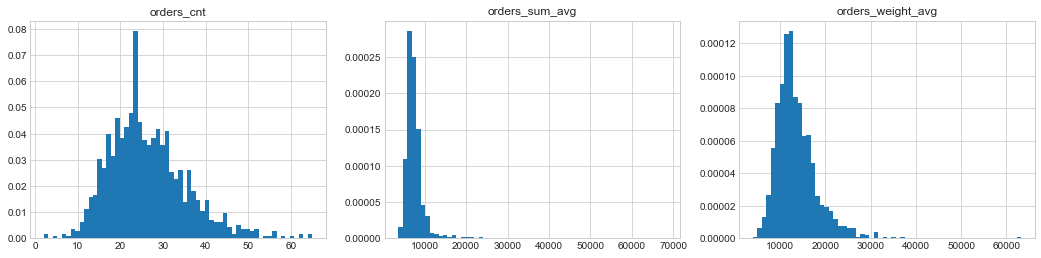

In [5]:
def drawHistogram (df, keys, bins=60):
    fig, axes = plt.subplots(ncols=len(keys))
    fig.set_size_inches(6 * len(keys), 4)
    num = 0
    for key in keys:
        axes[num].hist(df[key], density=True, bins=bins)
        axes[num].set_title(key)
        num+=1
    
drawHistogram(df, ['orders_cnt','orders_sum_avg','orders_weight_avg'])

Рассчитаем для этих величин выборочное среднее и дисперсию

In [6]:
df['orders_cnt'].mean(), df['orders_sum_avg'].mean(), df['orders_weight_avg'].mean()

(26.30228310502283, 7574.993600254, 13511.424361570153)

In [7]:
df['orders_cnt'].var(ddof=1), df['orders_sum_avg'].var(ddof=1), df['orders_weight_avg'].var(ddof=1)

(84.23669496548234, 10702839.907894231, 21392757.76788033)

### 2. Кореляционный анализ

Сначала посмотрим на корреляцию всех параметров (кроме категорийных, таких как: год, месяц, день месяца, день недели).
Выведем матрицу корреляции с коэффициентом корреляции Пирсона.

In [8]:
df[['orders_cnt','orders_sum','orders_weight','orders_weight_avg','orders_sum_avg','viewes','users','usd']].corr()

,orders_cnt,orders_sum,orders_weight,orders_weight_avg,orders_sum_avg,viewes,users,usd
orders_cnt,1.000000,0.682286,0.689709,-0.133929,0.139519,0.646151,0.320078,-0.400707
orders_sum,0.682286,1.000000,0.557330,0.010202,0.787136,0.430784,0.148244,-0.146765
orders_weight,0.689709,0.557330,1.000000,0.562385,0.214078,0.404825,0.190501,-0.200184
orders_weight_avg,-0.133929,0.010202,0.562385,1.000000,0.135588,-0.127568,-0.075271,0.152541
orders_sum_avg,0.139519,0.787136,0.214078,0.135588,1.000000,0.087879,-0.025352,0.093615
viewes,0.646151,0.430784,0.404825,-0.127568,0.087879,1.000000,0.809654,-0.442170
users,0.320078,0.148244,0.190501,-0.075271,-0.025352,0.809654,1.000000,-0.317674
usd,-0.400707,-0.146765,-0.200184,0.152541,0.093615,-0.442170,-0.317674,1.000000


Есть ряд очевидных и непредставляющих интерес высоких положительных корреляций между параметрами orders_cnt, orders_sum, orders_weight, viewes и users.

Но есть и ряд интересных взаимосвязей: 
* usd x orders_cnt, viewes - относительно высокая отрицательная корреляция
* orders_sum_avg x orders_weight_avg - относительно слабая корреляция, несмотря на то что средний вес должен расти вместе со средним чеком.

Мы можем предположить, что причина низкой корреляции среднего чека со средним весом может быть объяснена инфляцией и курсовой разницей (т.к. существенна часть продаваемых товаров является импортом).

Добавим новую колонку средний чек в USD и рассчитаем коэффициент Пирсона для нового параметра, а также рассчитаем коэффициент Кенадалла, чтобы проверить нелинейные корреляции. 

In [9]:
df['orders_sum_avg_usd'] = df['orders_sum_avg']/df['usd']
df[['orders_weight_avg','orders_sum_avg','orders_sum_avg_usd']].corr()

,orders_weight_avg,orders_sum_avg,orders_sum_avg_usd
orders_weight_avg,1.000000,0.135588,0.117806
orders_sum_avg,0.135588,1.000000,0.988942
orders_sum_avg_usd,0.117806,0.988942,1.000000


In [10]:
df[['orders_weight_avg','orders_sum_avg','orders_sum_avg_usd']].corr(method="kendall")

,orders_weight_avg,orders_sum_avg,orders_sum_avg_usd
orders_weight_avg,1.000000,0.191259,0.151393
orders_sum_avg,0.191259,1.000000,0.813132
orders_sum_avg_usd,0.151393,0.813132,1.000000


Видим, что предположение было неверным и корреляция не только не увеличилась, а наоборот, уменьшилась даже при учете ранговой корреляции.

А вот связь курса доллара и количества заказов довольно интересна.

### 3. Проверка на значимость связи курса доллара и количества заказов

Нулевая гипотеза: реальный коэффициент корреляции между курсом доллара и количеством заказов равен 0. 

Альтернативная гипотеза двухсторонняя.

Уровень значимости установим в 0.05

In [11]:
# подсчет статистики
def statistic(r:float, n: int) -> float:
    return r * math.sqrt(n-2) / math.sqrt(1-r**2)

n = df.shape[0]
r = df[['orders_cnt','usd']].corr()['orders_cnt']['usd']
alpha = 0.05

# Найдем границы критической области
from scipy import stats

t1 = stats.t.ppf(alpha / 2, df=n - 2)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 2)

t1, t2, statistic(r, n)

(-1.962136771101666, 1.9621367711016655, -14.459166793276456)

Статистика не попадает в критическую область, значит нулевая гипотеза отвергается и связь - есть.

На мой взгляд, это довольно неочевидная корреляция.

### 4. Проверка на нормальность среднего веса заказа

Мы проверим средний вес заказа, т.к. стоимость заказа согласно условиям сайта не может быть меньше 1500 р. Это ограничение может испортить нормальность ценовых показателей. В свою очередь вес заказа никаких односторонних ограничений не имеет. 

1) Оценим нормальность на соответствие правилу разброса

In [12]:
# Получение 3 сигм для нормального распределения
def sigma3Norm(loc, scale):
    sigmas = []
    for i in range(1, 4):
        sigmas.append(stats.norm.cdf(i) - stats.norm.cdf(-i))
    return sigmas

# Получение 3 сигм по выборке
def sigma3(df, key):
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()
    sigmas = []
    
    for i in range(1, 4):
        sigmas.append(((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0])
    return sigmas

In [13]:
sigma3Norm(df['orders_weight_avg'].mean(), df['orders_weight_avg'].std())

[0.6826894921370859, 0.9544997361036416, 0.9973002039367398]

In [14]:
sigma3(df, 'orders_weight_avg')

[0.7753424657534247, 0.958904109589041, 0.9872146118721461]

К сожалению, по правилу 3 сигм распределение среднего веса заказа не соответсвует нормальному распределению.

Посмотрим что мы увидим на графике Q-Q

In [15]:
# Изображение Q-Q графика
def Qq(df, key):
    fig, ax = plt.subplots(ncols=1)
    fig.set_size_inches(10, 4)

    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)

    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')

    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

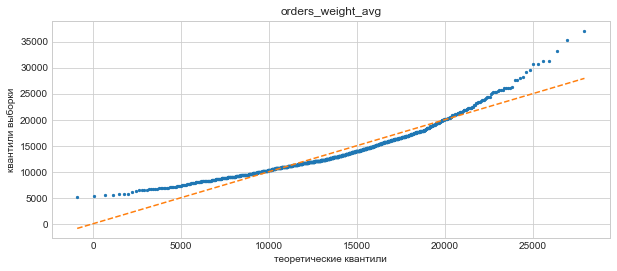

In [16]:
Qq(df, 'orders_weight_avg')

К сожалению, и тут мы получили расхождение с нормальными данными.
Скорее всего величина имеет отличное от нормального распределения.

### 5. Дисперсный анализ влияния месяца на выручку

Напоследок проведем дисперсный анализ влияния месяца на выручку.

Скорее всего период предноовогдних хлопот приводят к резкому повышению выручки.

Для начала посмотрим влоб на выборочное среднее и среднеквадратическое отклонение по месяцам.

In [17]:
for m in range(1,13):
    monthstr = str(m)
    print("Месяц "+str(monthstr))
    print(df.loc[df['month']==m].mean()['orders_sum'], df.loc[df['month']==m].std()['orders_sum'])

Месяц 1
220226.79569892472 90375.96487458465
Месяц 2
225963.40476190476 66909.22799253542
Месяц 3
219243.94623655913 77318.59180398608
Месяц 4
189292.13333333333 69325.08243121231
Месяц 5
168346.688172043 50684.14334813518
Месяц 6
151282.88888888888 51384.30549191448
Месяц 7
127571.6129032258 48718.52858045059
Месяц 8
140586.05376344087 62505.41240779726
Месяц 9
174758.2 66660.23382766935
Месяц 10
186080.16129032258 66323.91009270014
Месяц 11
228733.55555555556 189205.11320584986
Месяц 12
408949.75268817204 230901.71971517947


In [18]:
k = 12
n = df.shape[0]
alpha = 0.05

Определим критическую область для односторонней альтернативной гипотезы.

In [19]:
k1 = k-1
k2 = n-k

# критическая область
t = stats.f.ppf(1 - alpha, k1, k2)
t

1.797477209121018

Посчитаем статистику

In [20]:
SSb = 0
SSw = 0

Ymean = df.mean()['orders_sum']

for m in range(1,13):
    Yimean = df.loc[df['month']==m].mean()['orders_sum']
    Ni = df.loc[df['month']==m].shape[0]
    SSb += ((Yimean - Ymean)**2)*Ni
    nw = np.square((df.loc[df['month']==m]['orders_sum'] -Yimean).to_numpy(copy=True))
    SSw += nw.sum()

F = (SSb * (n-k)) / (SSw*(k-1))
F

44.64025906449105

Гипотеза провалилась с треском, а значит месяц влияет на сумму заказа.